Dataset : https://github.com/ayehninnkhine/MyanmarNewsClassificationSystem

Demo Website : https://share.streamlit.io/thuraaung1601/automatic-myanmar-news-classification/main/app.py

Github : https://github.com/ThuraAung1601/Automatic-Myanmar-News-Classification

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Data preparation

In [2]:
dataset = "./mm-news-classification-dataset.csv"

In [3]:
data = pd.read_csv(dataset)
print(data.head())

   Unnamed: 0                                               News  Category
0           0  ဒီမိုကရေစီ_ရ_မှ_အမျှဝေ_ပါ_ဟု_မဝင်းမော်ဦး_တောင်...  Politics
1           1  ဒီမိုကရေစီ_အရေး_လူ့အခွင့်အရေး_တောင်းဆို_ဆန္ဒပြ...  Politics
2           2  ၂၀၁၅_ခုနှစ်_အထွေထွေရွေးကောက်ပွဲ_တွင်_အမျိုးသား...  Politics
3           3  လာမည့်_စက်တင်ဘာ_၁၉_ရက်_တွင်_မဝင်းမော်ဦး_ကျဆုံး...  Politics
4           4  တပ်မတော်ကာကွယ်ရေးဦးစီးချုပ်_ဗိုလ်ချုပ်မှူးကြီး...  Politics


In [4]:
data.isnull().sum()


Unnamed: 0    0
News          0
Category      0
dtype: int64

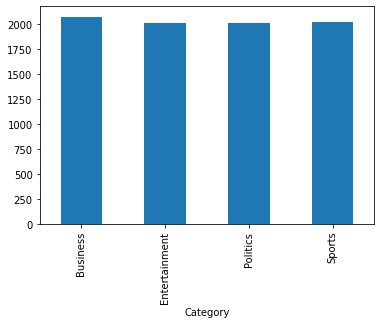

In [5]:
data['category_id'] = data['Category'].factorize()[0]
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist
data.groupby('Category').Index.count().plot.bar(ylim=0)

In [6]:
stopwordslist = []
slist = []
with open("./stop_words.txt", encoding = 'utf8') as stopwordsfile:
    stopwords = stopwordsfile.readlines()
    slist.extend(stopwords)

    for w in range(len(slist)):
        temp = slist[w]
        stopwordslist.append(temp.rstrip())


In [7]:
# import pyidaungsu as pds
# import re
# CleanPattern = re.compile(r'\d+|[၊။!-/:-@[-`{-~\t ]|[A-za-z0-9]')
# def clean_sentence(sentence):
#     sent = CleanPattern.sub(" ",sentence)
#     return sent

def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in stopwordslist:
      new_sentence.append(word)
  return(' '.join(new_sentence))


#def tokenize(line):
#    sentence = pds.tokenize(line,form="word")
#    sentence = ' '.join([str(elem) for elem in sentence])
#    sentence = stop_word(sentence)
#    return sentence
       
def clean_sentence(sentence):
  sentence = sentence.replace("_"," ")
  return sentence

data['News'] = data['News'].apply(stop_word)
data['News'] = data['News'].apply(clean_sentence)
data.head(10)

,Index,News,Category,category_id
0,0,ဒီမိုကရေစီ ရ မှ အမျှဝေ ပါ ဟု မဝင်းမော်ဦး တောင်...,Politics,0
1,1,ဒီမိုကရေစီ အရေး လူ့အခွင့်အရေး တောင်းဆို ဆန္ဒပြ...,Politics,0
2,2,၂၀၁၅ ခုနှစ် အထွေထွေရွေးကောက်ပွဲ တွင် အမျိုးသား...,Politics,0
3,3,လာမည့် စက်တင်ဘာ ၁၉ ရက် တွင် မဝင်းမော်ဦး ကျဆုံး...,Politics,0
4,4,တပ်မတော်ကာကွယ်ရေးဦးစီးချုပ် ဗိုလ်ချုပ်မှူးကြီး...,Politics,0
5,5,ထို တွေ့ဆုံ မှု တွင် မြန်မာနိုင်ငံ ငြိမ်းချမ်း...,Politics,0
6,6,ယနေ့ တွင် နေ့ချင်းပြန်ခရီး စဉ် အဖြစ် မြန်မာနို...,Politics,0
7,7,အလုပ်သမား တွေ နေပြည်တော် ကို ဆက်လက် ချီတက် မယ် ။,Politics,0
8,8,မန္တလေး တိုင်းဒေသကြီး စဉ့်ကိုင် မြို့ ဖါးလင်ပိ...,Politics,0
9,9,ခုံသမာဓိ ကောင်စီ ရဲ့ ကြားနာ စစ်ဆေးမှု ကို ခံယူ...,Politics,0


In [8]:
data = data[["News", "Category"]]

x = np.array(data["News"])
y = np.array(data["Category"])

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

In [10]:
import pickle
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=440)

### Naive Bayes 

In [12]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [13]:
# predict
y_pred = model.predict(X_test)

In [14]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier MultinomialNB():
               precision    recall  f1-score   support

     Business       0.72      0.78      0.75       412
Entertainment       0.80      0.80      0.80       415
     Politics       0.72      0.74      0.73       383
       Sports       0.85      0.77      0.81       413

     accuracy                           0.77      1623
    macro avg       0.78      0.77      0.77      1623
 weighted avg       0.78      0.77      0.77      1623




### Linear SVM

In [70]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

# linear kernel model

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# predict
y_pred = svm_model.predict(X_test)

In [71]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {svm_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(kernel='linear'):
               precision    recall  f1-score   support

     Business       0.76      0.75      0.76       412
Entertainment       0.74      0.83      0.78       415
     Politics       0.69      0.76      0.72       383
       Sports       0.90      0.73      0.81       413

     accuracy                           0.77      1623
    macro avg       0.77      0.77      0.77      1623
 weighted avg       0.78      0.77      0.77      1623




### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
rf_model.fit(X_train,y_train)

# predict
y_pred = rf_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier RandomForestClassifier(n_jobs=1):
               precision    recall  f1-score   support

     Business       0.76      0.75      0.75       412
Entertainment       0.74      0.83      0.78       415
     Politics       0.68      0.72      0.70       383
       Sports       0.88      0.73      0.80       413

     accuracy                           0.76      1623
    macro avg       0.77      0.76      0.76      1623
 weighted avg       0.77      0.76      0.76      1623




### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

# predict
y_pred = dt_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {dt_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier DecisionTreeClassifier(random_state=0):
               precision    recall  f1-score   support

     Business       0.62      0.61      0.61       412
Entertainment       0.66      0.68      0.67       415
     Politics       0.54      0.59      0.56       383
       Sports       0.74      0.67      0.70       413

     accuracy                           0.64      1623
    macro avg       0.64      0.64      0.64      1623
 weighted avg       0.64      0.64      0.64      1623




### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
best_k = dict()

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    best_k[i] = np.mean(pred_i != y_test)
    
best_k = sorted(best_k.items(), key=lambda k: k[1])[0][0]
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

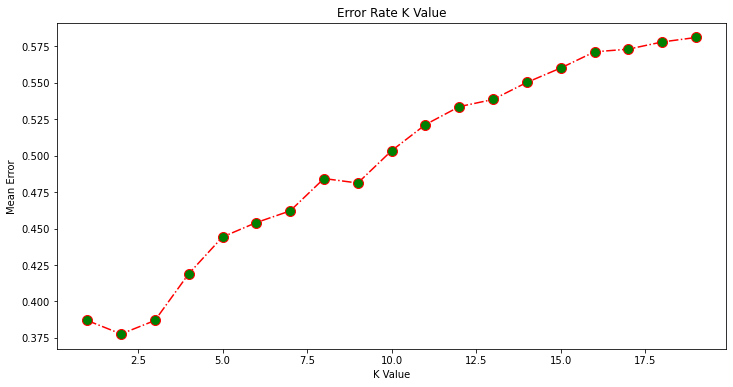

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashdot', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {knn_classifier}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier KNeighborsClassifier(n_jobs=-1, n_neighbors=2):
               precision    recall  f1-score   support

     Business       0.65      0.60      0.62       412
Entertainment       0.50      0.80      0.61       415
     Politics       0.66      0.58      0.62       383
       Sports       0.90      0.50      0.64       413

     accuracy                           0.62      1623
    macro avg       0.68      0.62      0.62      1623
 weighted avg       0.68      0.62      0.62      1623




### Post-processing

In [59]:
# save the model to disk
import pickle

filename = 'nb_model.sav'
pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
! pip install pyidaungsu 

In [42]:
line = "ဒီကနေ့ ဒီဇင်ဘာလ ၂၁ ရက်နေ့ နေ့လယ်ပိုင်းမှာလည်း ရေဦးနဲ့ တန့်ဆည်မြို့နယ် နယ်နမိတ်ထိစပ်နေတဲ့နေရာနားက လိပ်ခြံရွာက ပီဒီအက်ဖ်စခန်းတွေလို့ ယူဆတဲ့နေရာတွေကို စစ်ကောင်စီတပ်ရဲ့ ရဟတ်ယာဉ်တွေက ပစ်ခတ်တာတွေ ဆက်လုပ်ခဲ့တယ်လို့ ဒေသခံတွေထံက သိရပါတယ်။"

In [32]:
stopwordslist = []
slist = []
with open("./stop_words.txt", encoding = 'utf8') as stopwordsfile:
    stopwords = stopwordsfile.readlines()
    slist.extend(stopwords)

    for w in range(len(slist)):
        temp = slist[w]
        stopwordslist.append(temp.rstrip())


In [33]:
def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in stopwordslist:
      new_sentence.append(word)
  return(' '.join(new_sentence))

In [ ]:
import pyidaungsu as pds

def tokenize(line):
    sentence = pds.tokenize(line,form="word")
    sentence = ' '.join([str(elem) for elem in sentence])
    sentence = stop_word(sentence)
    return sentence

In [43]:
tokenize(line)

'ဒီ က နေ့ ဒီဇင်ဘာ လ ၂၁ ရက်နေ့ နေ့လယ် ပိုင်း မှာ လည်း ရေဦး နဲ့ တန့်ဆည် မြို့နယ် နယ်နမိတ် ထိစပ် နေ နေရာ နားကလိပ်ခြံ ရွာ က ပီဒီအက်ဖ်စခန်း တွေ လို့ ယူဆ နေရာ တွေ ကို စစ်ကောင်စီ တပ် ရဲ့ ရဟတ်ယာဉ် တွေ က ပစ်ခတ် တာ တွေ ဆက်လုပ် ခဲ့ တယ် လို့ ဒေသခံ တွေ ထံ က သိရ ပါ တယ် ။'

In [ ]:
user = input("Enter a Text: ")
user = tokenize(user)
data = vectorizer.transform([user]).toarray()
output = loaded_model.predict(data)
print(output)